# Preprocessing Data and do the 1st EDA 

<br>

#### There are 10,000 tweets; ~7,000 will be our training dataset to fit our model. This dataset includes information about ID, keywords, location, and the text of tweets. In addition, these tweets are labeled as an actual disaster (1) or not a disaster (0).

<br>

- ## [Load the training data](#loading-data)
- ## [Preprocessing data](#data-cleaning-and-feature-engineering)
- ## [EDA](#eda)



## Loading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import string
import re

import nltk
nltk.download("stopwords")
nltk.download("punkt")
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

import warnings

warnings.filterwarnings('ignore')

RSEED = 42
stopword = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /Users/xuxu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/xuxu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/xuxu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/xuxu/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/xuxu/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
df = pd.read_csv("../data/train.csv")

In [3]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


#### We have 7631 samples in the training dataset, with 0.8% missing values in the keyword and 33.27% in location. And the text column is the feature we are going to use.

## Data cleaning and feature engineering

#### Before we do some EDA on the text we need to clean the text first

#### _Remove ulrs_ :
- (https?:\/\/) ---> http:// or https://
- (\s)*  ---> optional white spaces
- (www\.)? ---> optionally matches www.
- ((\w|\s)+\.)* ---> matches 0 or more of one or more word characters followed by a period
- ([\w\-\s]+\/)* ---> matches 0 or more of one word (or a dash or a space) followed by '\'
- ([\w\-]+) ---> any remaining path at the end of the url followed by an optional ending
- ((\?)?[\w\s]*=\s*[\w\%&]*)* ---> matches ending query params (even with white spaces,etc)
#### _Remove emojis_
#### _Remove html tags_
#### _Remove punctuations_


In [5]:
def remove_url(text):
    url = re.compile(r'(https?:\/\/)(\s)*(www\.)?(\s)*((\w|\s)+\.)*([\w\-\s]+\/)*([\w\-]+)((\?)?[\w\s]*=\s*[\w\%&]*)*')
    return url.sub(r'', text)

def remove_emoji(text):
    emoji = re.compile("["
        u"\U0001F600-\U0001F64F"  # emotions
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                           "]+", flags=re.UNICODE)
    return emoji.sub(r'', text)

def remove_html(text):
    html = re.compile(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    return html.sub(r'', text)

def remove_punctuation(text):
    punc = str.maketrans('', '', string.punctuation)
    return text.translate(punc)

#### Apply functions to get clean text

In [6]:
df["text_clean"] = df["text"].apply(lambda x: remove_url(x))
df["text_clean"] = df["text_clean"].apply(lambda x: remove_emoji(x))
df["text_clean"] = df["text_clean"].apply(lambda x: remove_html(x))
df["text_clean"] = df["text_clean"].apply(lambda x: remove_punctuation(x))

In [7]:
df.head()

,id,keyword,location,text,target,text_clean
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this earthquake Ma...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask Canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to shelter in place are be...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby Alaska as s...


#### Tokenizing text

In [8]:
df["text_token"] = df["text_clean"].apply(word_tokenize)
df["text_token"] = df["text_token"].apply(lambda x: [word.lower() for word in x])

In [9]:
df.head()

,id,keyword,location,text,target,text_clean,text_token
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this earthquake Ma...,"[our, deeds, are, the, reason, of, this, earth..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask Canada,"[forest, fire, near, la, ronge, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby Alaska as s...,"[just, got, sent, this, photo, from, ruby, ala..."


#### Remove stopwords

In [10]:
df["text_final"] = df["text_token"].apply(lambda x: [word for word in x if word not in stopword])

In [11]:
df.head()

,id,keyword,location,text,target,text_clean,text_token,text_final
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this earthquake Ma...,"[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask Canada,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby Alaska as s...,"[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi..."


#### Add speech tags

![Speech Tags](../images/Penn-Treebank-Parts-of-Speech-Tags-excluding-punctuations.png)

In [12]:
df["pos_tags"] = df["text_final"].apply(nltk.tag.pos_tag)

In [13]:
df.head()

,id,keyword,location,text,target,text_clean,text_token,text_final,pos_tags
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this earthquake Ma...,"[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv...","[(deeds, NNS), (reason, NN), (earthquake, NN),..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask Canada,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]","[(forest, JJS), (fire, NN), (near, IN), (la, J..."
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o...","[(residents, NNS), (asked, VBD), (shelter, JJ)..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation...","[(13000, CD), (people, NNS), (receive, JJ), (w..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby Alaska as s...,"[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi...","[(got, VBD), (sent, JJ), (photo, NN), (ruby, N..."


#### Convert tags to wordnet format

In [14]:
def convert_to_wordnet(tag):
    if tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

df["wordnet_tag"] = df["pos_tags"].apply(lambda x: [(word, convert_to_wordnet(pos_tag)) for (word, pos_tag) in x])

In [15]:
df.head()

,id,keyword,location,text,target,text_clean,text_token,text_final,pos_tags,wordnet_tag
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this earthquake Ma...,"[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv...","[(deeds, NNS), (reason, NN), (earthquake, NN),...","[(deeds, n), (reason, n), (earthquake, n), (ma..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask Canada,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]","[(forest, JJS), (fire, NN), (near, IN), (la, J...","[(forest, a), (fire, n), (near, n), (la, a), (..."
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o...","[(residents, NNS), (asked, VBD), (shelter, JJ)...","[(residents, n), (asked, v), (shelter, a), (pl..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation...","[(13000, CD), (people, NNS), (receive, JJ), (w...","[(13000, n), (people, n), (receive, a), (wildf..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby Alaska as s...,"[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi...","[(got, VBD), (sent, JJ), (photo, NN), (ruby, N...","[(got, v), (sent, a), (photo, n), (ruby, n), (..."


#### Lemmatizer

In [16]:
wnl = WordNetLemmatizer()
df["lemmatize"] = df["wordnet_tag"].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
df["lemmatize"] = df["lemmatize"].apply(lambda x: [word for word in x if word not in stopword])
df["text_lemma"] = [' '.join(map(str, x)) for x in df["lemmatize"]]

In [23]:
df.head()

,id,keyword,location,text,target,text_clean,text_token,text_final,pos_tags,wordnet_tag,lemmatize,text_lemma,char_count1,char_count2,word_count1,word_count2,mword_leng1,mword_leng2
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this earthquake Ma...,"[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv...","[(deeds, NNS), (reason, NN), (earthquake, NN),...","[(deeds, n), (reason, n), (earthquake, n), (ma...","[deed, reason, earthquake, may, allah, forgive...",deed reason earthquake may allah forgive u,68,42,13,7,4.307692,5.142857
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask Canada,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]","[(forest, JJS), (fire, NN), (near, IN), (la, J...","[(forest, a), (fire, n), (near, n), (la, a), (...","[forest, fire, near, la, ronge, sask, canada]",forest fire near la ronge sask canada,37,37,7,7,4.428571,4.428571
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o...","[(residents, NNS), (asked, VBD), (shelter, JJ)...","[(residents, n), (asked, v), (shelter, a), (pl...","[resident, ask, shelter, place, notify, office...",resident ask shelter place notify officer evac...,130,79,22,11,4.954545,6.272727
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation...","[(13000, CD), (people, NNS), (receive, JJ), (w...","[(13000, n), (people, n), (receive, a), (wildf...","[13000, people, receive, wildfire, evacuation,...",13000 people receive wildfire evacuation order...,63,57,8,7,6.875000,7.285714
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby Alaska as s...,"[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi...","[(got, VBD), (sent, JJ), (photo, NN), (ruby, N...","[(got, v), (sent, a), (photo, n), (ruby, n), (...","[get, sent, photo, ruby, alaska, smoke, wildfi...",get sent photo ruby alaska smoke wildfires pou...,86,54,16,9,4.375000,5.111111


#### Save the dataframe to a new csv and pickle file
- when convert the data frame to csv file, the lists will be also convert to strings. Remember to convert them back while read them

In [19]:
df.to_csv("../data/preprocess_train.csv", index=False)

In [24]:
df.to_pickle("../data/preprocess_train.pkl")

In [25]:
df_new2 = pd.read_pickle("../data/preprocess_train.pkl")

In [26]:
df_new2.head()

,id,keyword,location,text,target,text_clean,text_token,text_final,pos_tags,wordnet_tag,lemmatize,text_lemma,char_count1,char_count2,word_count1,word_count2,mword_leng1,mword_leng2
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this earthquake Ma...,"[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv...","[(deeds, NNS), (reason, NN), (earthquake, NN),...","[(deeds, n), (reason, n), (earthquake, n), (ma...","[deed, reason, earthquake, may, allah, forgive...",deed reason earthquake may allah forgive u,68,42,13,7,4.307692,5.142857
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask Canada,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]","[(forest, JJS), (fire, NN), (near, IN), (la, J...","[(forest, a), (fire, n), (near, n), (la, a), (...","[forest, fire, near, la, ronge, sask, canada]",forest fire near la ronge sask canada,37,37,7,7,4.428571,4.428571
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o...","[(residents, NNS), (asked, VBD), (shelter, JJ)...","[(residents, n), (asked, v), (shelter, a), (pl...","[resident, ask, shelter, place, notify, office...",resident ask shelter place notify officer evac...,130,79,22,11,4.954545,6.272727
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation...","[(13000, CD), (people, NNS), (receive, JJ), (w...","[(13000, n), (people, n), (receive, a), (wildf...","[13000, people, receive, wildfire, evacuation,...",13000 people receive wildfire evacuation order...,63,57,8,7,6.875000,7.285714
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby Alaska as s...,"[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi...","[(got, VBD), (sent, JJ), (photo, NN), (ruby, N...","[(got, v), (sent, a), (photo, n), (ruby, n), (...","[get, sent, photo, ruby, alaska, smoke, wildfi...",get sent photo ruby alaska smoke wildfires pou...,86,54,16,9,4.375000,5.111111


In [49]:
df_new = pd.read_csv("../data/preprocess_train.csv", converters={'text_token': pd.eval, 'text_final': pd.eval, 'pos_tags': pd.eval,
                      'wordnet_tag': pd.eval, 'lemmatize': pd.eval})
df_new.head()

,id,keyword,location,text,target,text_clean,text_token,text_final,pos_tags,wordnet_tag,lemmatize,text_lemma
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this earthquake Ma...,"[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv...","[[deeds, NNS], [reason, NN], [earthquake, NN],...","[[deeds, n], [reason, n], [earthquake, n], [ma...","[deed, reason, earthquake, may, allah, forgive...",deed reason earthquake may allah forgive u
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask Canada,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]","[[forest, JJS], [fire, NN], [near, IN], [la, J...","[[forest, a], [fire, n], [near, n], [la, a], [...","[forest, fire, near, la, ronge, sask, canada]",forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o...","[[residents, NNS], [asked, VBD], [shelter, JJ]...","[[residents, n], [asked, v], [shelter, a], [pl...","[resident, ask, shelter, place, notify, office...",resident ask shelter place notify officer evac...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation...","[[13000, CD], [people, NNS], [receive, JJ], [w...","[[13000, n], [people, n], [receive, a], [wildf...","[13000, people, receive, wildfire, evacuation,...",13000 people receive wildfire evacuation order...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby Alaska as s...,"[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi...","[[got, VBD], [sent, JJ], [photo, NN], [ruby, N...","[[got, v], [sent, a], [photo, n], [ruby, n], [...","[get, sent, photo, ruby, alaska, smoke, wildfi...",get sent photo ruby alaska smoke wildfires pou...


## EDA
- ### [Pai chart of the target](#pai-chart)
- ### [Histogram of characters in case 0 & 1](#histogram-of-words-characters)
- ### [Histogram of words in case 0 & 1](#histogram-of-words)
- ### [Histogram of mean word length in case 0 & 1](#histogram-of-word-length)

#### **_Pai Chart_**

In [23]:
t_tweet = df["target"].value_counts().sort_index()

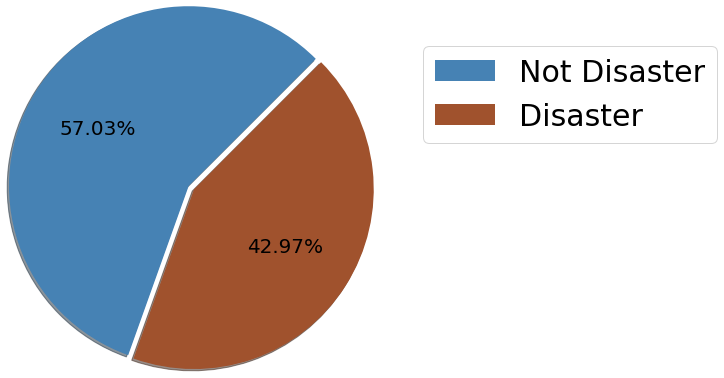

In [24]:
plt.gca().axis("equal")
color = ["steelblue", "sienna"]
pie = plt.pie(t_tweet, startangle=45, pctdistance=0.6, colors=color, autopct='%1.2f%%', radius=2.0, 
              explode=(0.07, 0), textprops={'fontsize': 20}, shadow=True)
labels = ["Not Disaster", "Disaster"]


plt.legend(pie[0],labels, bbox_to_anchor=(1.67,0.82), loc="center right", fontsize=30, 
           bbox_transform=plt.gcf().transFigure)

plt.subplots_adjust(left=0.0, bottom=0.1, right=0.85)

#### **_Histogram of words characters_**

In [25]:
#df["char_count1"] = df["text_clean"].apply(lambda x: len(str(x))) 
#df["char_count2"] = df["text_lemma"].apply(lambda x: len(str(x)))

In [18]:
df["char_count1"] = df["text_clean"].apply(len) 
df["char_count2"] = df["text_lemma"].apply(len)

In [19]:
df['word_count1'] = df['text_clean'].apply(lambda x: len(str.split(x)))
df['word_count2'] = df['text_lemma'].apply(lambda x: len(str.split(x)))

In [21]:
df['mword_leng1'] = df['text_clean'].str.split().apply(lambda x: [len(i) for i in x]).map(lambda x: np.mean(x))
df['mword_leng2'] = df['text_lemma'].str.split().apply(lambda x: [len(i) for i in x]).map(lambda x: np.mean(x))

In [22]:
df.head()

,id,keyword,location,text,target,text_clean,text_token,text_final,pos_tags,wordnet_tag,lemmatize,text_lemma,char_count1,char_count2,word_count1,word_count2,mword_leng1,mword_leng2
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,Our Deeds are the Reason of this earthquake Ma...,"[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv...","[(deeds, NNS), (reason, NN), (earthquake, NN),...","[(deeds, n), (reason, n), (earthquake, n), (ma...","[deed, reason, earthquake, may, allah, forgive...",deed reason earthquake may allah forgive u,68,42,13,7,4.307692,5.142857
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,Forest fire near La Ronge Sask Canada,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]","[(forest, JJS), (fire, NN), (near, IN), (la, J...","[(forest, a), (fire, n), (near, n), (la, a), (...","[forest, fire, near, la, ronge, sask, canada]",forest fire near la ronge sask canada,37,37,7,7,4.428571,4.428571
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,All residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o...","[(residents, NNS), (asked, VBD), (shelter, JJ)...","[(residents, n), (asked, v), (shelter, a), (pl...","[resident, ask, shelter, place, notify, office...",resident ask shelter place notify officer evac...,130,79,22,11,4.954545,6.272727
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation...","[(13000, CD), (people, NNS), (receive, JJ), (w...","[(13000, n), (people, n), (receive, a), (wildf...","[13000, people, receive, wildfire, evacuation,...",13000 people receive wildfire evacuation order...,63,57,8,7,6.875000,7.285714
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,Just got sent this photo from Ruby Alaska as s...,"[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi...","[(got, VBD), (sent, JJ), (photo, NN), (ruby, N...","[(got, v), (sent, a), (photo, n), (ruby, n), (...","[get, sent, photo, ruby, alaska, smoke, wildfi...",get sent photo ruby alaska smoke wildfires pou...,86,54,16,9,4.375000,5.111111


(array([112., 289., 439., 516., 552., 583., 574., 610., 396., 271.]),
 array([  6. ,  19.9,  33.8,  47.7,  61.6,  75.5,  89.4, 103.3, 117.2,
        131.1, 145. ]),
 <BarContainer object of 10 artists>)

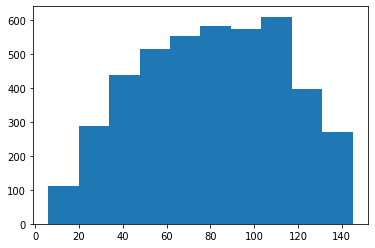

In [20]:
plt.hist(df[df["target"]==0]["char_count1"])

(array([141., 444., 626., 597., 755., 790., 577., 327.,  74.,  11.]),
 array([  3. ,  15.7,  28.4,  41.1,  53.8,  66.5,  79.2,  91.9, 104.6,
        117.3, 130. ]),
 <BarContainer object of 10 artists>)

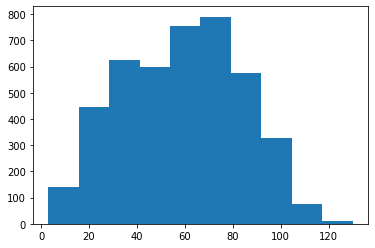

In [28]:
plt.hist(df[df["target"]==0]["char_count2"])

(array([ 20.,  94., 184., 381., 466., 462., 428., 762., 222., 252.]),
 array([  7. ,  20.6,  34.2,  47.8,  61.4,  75. ,  88.6, 102.2, 115.8,
        129.4, 143. ]),
 <BarContainer object of 10 artists>)

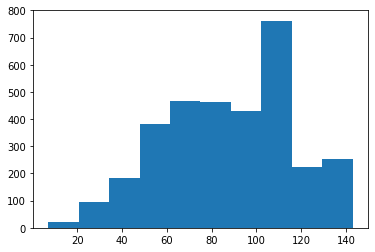

In [29]:
plt.hist(df[df["target"]==1]["char_count1"])

(array([ 36., 167., 357., 544., 642., 729., 535., 207.,  50.,   4.]),
 array([  5. ,  18.2,  31.4,  44.6,  57.8,  71. ,  84.2,  97.4, 110.6,
        123.8, 137. ]),
 <BarContainer object of 10 artists>)

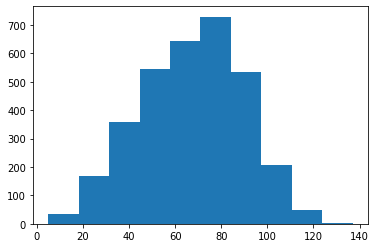

In [30]:
plt.hist(df[df["target"]==1]["char_count2"])

#### **_Histogram of words_**

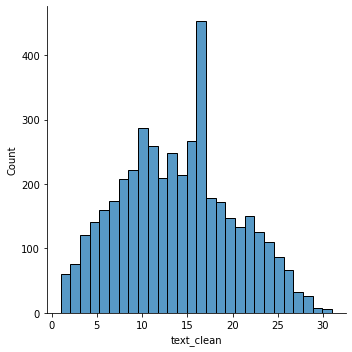

In [31]:
sns.displot(df[df["target"]==0]["text_clean"].str.split().map(lambda x: len(x)))

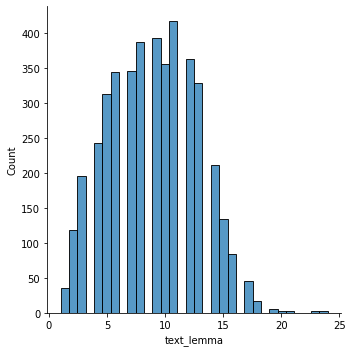

In [32]:
sns.displot(df[df["target"]==0]["text_lemma"].str.split().map(lambda x: len(x)))

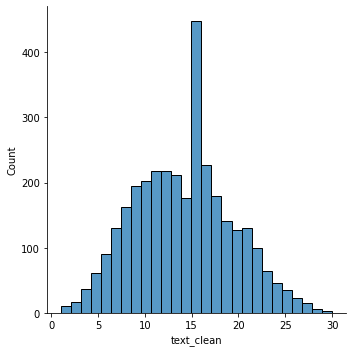

In [33]:
sns.displot(df[df["target"]==1]["text_clean"].str.split().map(lambda x: len(x)))

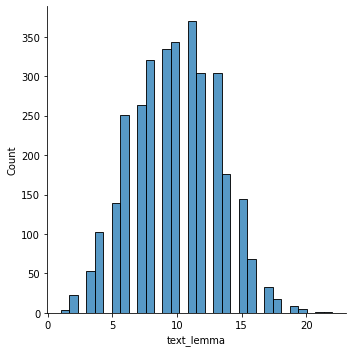

In [34]:
sns.displot(df[df["target"]==1]["text_lemma"].str.split().map(lambda x: len(x)))

#### **_Histogram of word length_**

<AxesSubplot:xlabel='text_clean', ylabel='Density'>

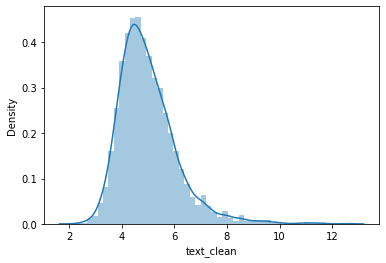

In [35]:
sns.distplot(df[df["target"]==0]["text_clean"].str.split().apply(lambda x: [len(i) for i in x]).map(
              lambda x: np.mean(x)))

<AxesSubplot:xlabel='text_lemma', ylabel='Density'>

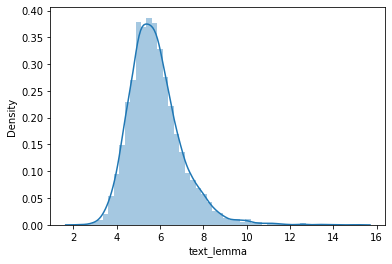

In [36]:
sns.distplot(df[df["target"]==0]["text_lemma"].str.split().apply(lambda x: [len(i) for i in x]).map(
              lambda x: np.mean(x)))

<AxesSubplot:xlabel='text_clean', ylabel='Density'>

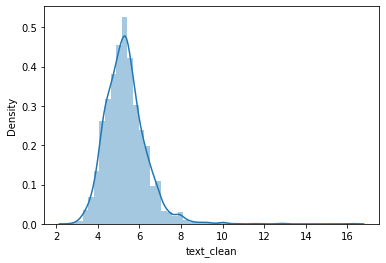

In [37]:
sns.distplot(df[df["target"]==1]["text_clean"].str.split().apply(lambda x: [len(i) for i in x]).map(
              lambda x: np.mean(x)))

<AxesSubplot:xlabel='text_lemma', ylabel='Density'>

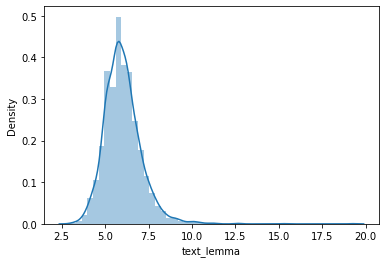

In [38]:
sns.distplot(df[df["target"]==1]["text_lemma"].str.split().apply(lambda x: [len(i) for i in x]).map(
              lambda x: np.mean(x)))